In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

### Loading the Dataset

In [ ]:
# cloning
!git clone https://github.com/sarang-iitb/H-captcha-dataset

Cloning into 'H-captcha-dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_data('/content/H-captcha-dataset/hcaptcha_dataset.zip')

### Data Cleaning and Visualization

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
train_labels = os.listdir('/content/hcaptcha_dataset/train')
train_labels

['truck', 'motorbus', 'motorcycle', 'airplane', 'bicycle', 'seaplane', 'boat']

In [ ]:
test_labels = os.listdir('/content/hcaptcha_dataset/test')
test_labels

['truck', 'motorbus', 'motorcycle', 'airplane', 'bicycle', 'seaplane', 'boat']

In [ ]:
# Both train and test dataset contain same labels
# So,

labels = ['motorcycle', 'airplane', 'bicycle', 'motorbus', 'boat', 'truck', 'seaplane']

In [ ]:
label_str2int = {
  'motorcycle':0,
  'airplane':1,
  'bicycle':2,
  'motorbus':3,
  'boat':4,
  'truck':5,
  'seaplane':6
}

In [ ]:
label_int2str = {
  0:'motorcycle',
  1:'airplane',
  2:'bicycle',
  3:'motorbus',
  4:'boat',
  5:'truck',
  6:'seaplane'
}

In [ ]:
# Creating a dictionary which contains label as a key
# and list of all images belonging to that class
# as value

# Train dataset
train_image={}

for label in labels:
  train_image[label] = list(map(lambda image: cv2.imread(os.path.join('/content/hcaptcha_dataset/train',label,image)),os.listdir(os.path.join('/content/hcaptcha_dataset/train',label))))

# Test dataset
test_image={}

for label in labels:
  test_image[label] = list(map(lambda image: cv2.imread(os.path.join('/content/hcaptcha_dataset/test',label,image)),os.listdir(os.path.join('/content/hcaptcha_dataset/test',label))))

In [ ]:
# we will do further computations
# on train_image and test_image data
# and keep train_original and test_original
# as it is

import copy

train_original = copy.deepcopy(train_image)

test_original = copy.deepcopy(test_image)

In [ ]:
import joblib

joblib.dump(test_original,'test_original.pkl')

['test_original.pkl']

In [ ]:
train_labels_image_count = {}
test_labels_image_count = {}

for label in labels:
  train_labels_image_count[label] = len(os.listdir(os.path.join('/content/hcaptcha_dataset/train',label)))

for label in labels:
  test_labels_image_count[label] = len(os.listdir(os.path.join('/content/hcaptcha_dataset/test',label)))

In [ ]:
# Train dataset: images belong to each class

for label in labels:
  print(f'Count of {label} images: {train_labels_image_count[label]}')

Count of motorcycle images: 592
Count of airplane images: 402
Count of bicycle images: 304
Count of motorbus images: 256
Count of boat images: 528
Count of truck images: 656
Count of seaplane images: 280


In [ ]:
# Test dataset: images belong to each class

for label in labels:
  print(f'Count of {label} images: {test_labels_image_count[label]}')

Count of motorcycle images: 141
Count of airplane images: 101
Count of bicycle images: 71
Count of motorbus images: 61
Count of boat images: 134
Count of truck images: 163
Count of seaplane images: 75


In [ ]:
# Train + Test dataset: images belong to each class

for label in labels:
  print(f'Count of {label} images: {train_labels_image_count[label] + test_labels_image_count[label]}')

Count of motorcycle images: 733
Count of airplane images: 503
Count of bicycle images: 375
Count of motorbus images: 317
Count of boat images: 662
Count of truck images: 819
Count of seaplane images: 355


In [ ]:
train_images_count = sum(train_labels_image_count.values())
test_images_count = sum(test_labels_image_count.values())

print(f'Count of train images: {train_images_count}')
print(f'Count of test images: {test_images_count}')

Count of train images: 3018
Count of test images: 746


In [ ]:
# Checking Shape of Train images

train_shapes = []

for label in train_image:
  for image in train_image[label]:
    train_shapes.append(image.shape)


# Checking Shape of Test images

test_shapes = []

for label in test_image:
  for image in test_image[label]:
    test_shapes.append(image.shape)

In [ ]:
print(f'Shapes of images in Train dataset: {set(train_shapes)}')
print(f'Shapes of images in Test dataset: {set(test_shapes)}')

Shapes of images in Train dataset: {(144, 144, 3), (128, 128, 3)}
Shapes of images in Test dataset: {(144, 144, 3), (128, 128, 3)}


In [ ]:
print(f'Count of images with shape (144, 144, 3) in Train dataset: {train_shapes.count((144, 144, 3))}')
print(f'Count of images with shape (128, 128, 3) in Train dataset: {train_shapes.count((128, 128, 3))}')

Count of images with shape (144, 144, 3) in Train dataset: 79
Count of images with shape (128, 128, 3) in Train dataset: 2939


In [ ]:
print(f'Count of images with shape (144, 144, 3) in Test dataset: {test_shapes.count((144, 144, 3))}')
print(f'Count of images with shape (128, 128, 3) in Test dataset: {test_shapes.count((128, 128, 3))}')

Count of images with shape (144, 144, 3) in Test dataset: 20
Count of images with shape (128, 128, 3) in Test dataset: 726


In [ ]:
# Resizing all images to shape (64, 64, 3)

# Train dataset

for label in labels:
  for i in range(len(train_image[label])):
    train_image[label][i] = cv2.resize(train_image[label][i], (64, 64))

# Test dataset

for label in labels:
  for i in range(len(test_image[label])):
    test_image[label][i] = cv2.resize(test_image[label][i], (64, 64))

In [ ]:
# Checking Shape of Train images after resizing

train_shapes = []

for label in train_image:
  for image in train_image[label]:
    train_shapes.append(image.shape)


# Checking Shape of Test images after resizing

test_shapes = []

for label in test_image:
  for image in test_image[label]:
    test_shapes.append(image.shape)

In [ ]:
print(f'Shapes of images in Train dataset: {set(train_shapes)}')
print(f'Shapes of images in Test dataset: {set(test_shapes)}')

Shapes of images in Train dataset: {(64, 64, 3)}
Shapes of images in Test dataset: {(64, 64, 3)}


In [ ]:
# Grayscaling all the images

# Train dataset

for label in labels:
  for i in range(len(train_image[label])):
    train_image[label][i] = cv2.cvtColor(train_image[label][i], cv2.COLOR_BGR2GRAY)

# Test dataset

for label in labels:
  for i in range(len(test_image[label])):
    test_image[label][i] = cv2.cvtColor(test_image[label][i], cv2.COLOR_BGR2GRAY)

In [ ]:
# Normalizing images

# Train dataset

for label in labels:
  for i in range(len(train_image[label])):
    train_image[label][i] = (train_image[label][i])/255

# Test dataset

for label in labels:
  for i in range(len(test_image[label])):
    test_image[label][i] = (test_image[label][i])/255

In [ ]:
# Storing images and their labels in 2-d array

import numpy as np

train_image_data = []
test_image_data = []

for label in labels:
  for i in range(len(train_image[label])):
    train_image_data.append(np.concatenate((train_image[label][i].reshape(64*64,),[int(j==label_str2int[label]) for j in range(7)])))

for label in labels:
  for i in range(len(test_image[label])):
    test_image_data.append(np.concatenate((test_image[label][i].reshape(64*64,),[int(j==label_str2int[label]) for j in range(7)])))

train_image_data = np.array(train_image_data)
test_image_data = np.array(test_image_data)

In [ ]:
train_image_data.shape

(3018, 4103)

In [ ]:
test_image_data.shape

(746, 4103)

In [ ]:
# shuffling the training data

In [ ]:
np.random.shuffle(train_image_data)

In [ ]:
# shuffling the testing data

In [ ]:
np.random.shuffle(test_image_data)

In [ ]:
train_image_X = train_image_data[:,:-7]
train_image_y = train_image_data[:,-7:]

In [ ]:
test_image_X = test_image_data[:,:-7]
test_image_y = test_image_data[:,-7:]

In [ ]:
train_image_X.shape, train_image_y.shape, test_image_X.shape, test_image_y.shape

((3018, 4096), (3018, 7), (746, 4096), (746, 7))

### Building Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

In [ ]:
# baseline neural network

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_image_X, train_image_y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2414, 4096), (604, 4096), (2414, 7), (604, 7))

In [ ]:
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_val = tf.constant(X_val)
y_val = tf.constant(y_val)

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_addons as tfa

In [ ]:
micro_f1 = tfa.metrics.F1Score(num_classes=7, average='micro', name='micro_f1')
macro_f1 = tfa.metrics.F1Score(num_classes=7, average='macro', name='macro_f1')

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

baseline_res = {
        'accuracy' : [],
        'micro' : [],
        'macro' : []
}

labels = np.array(list(map(lambda x: np.argmax(x),train_image_y)))

fold_no = 1
for train, test in skf.split(train_image_X, labels):

  print(f'Training on fold {fold_no}:')

  baseline_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1024, activation='sigmoid'),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(64, activation='sigmoid'),
  tf.keras.layers.Dense(7, activation='softmax'),
  ])
  
  baseline_model.compile(loss = 'categorical_crossentropy',
                        optimizer = tf.keras.optimizers.SGD(learning_rate=0.05),
                        metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                        )

  history = baseline_model.fit(train_image_X[train], train_image_y[train], batch_size=128, epochs=30, validation_data=(train_image_X[test], train_image_y[test]))

  scores = baseline_model.evaluate(train_image_X[test], train_image_y[test])

  baseline_res['accuracy'].append(scores[1])
  baseline_res['micro'].append(scores[2])
  baseline_res['macro'].append(scores[3])

  fold_no = fold_no + 1

Training on fold 1:
Epoch 1/30
19/19 [==============================] - 1s 21ms/step - loss: 1.9466 - categorical_accuracy: 0.2055 - micro_f1: 0.3222 - macro_f1: 0.2784 - val_loss: 1.8830 - val_categorical_accuracy: 0.2152 - val_micro_f1: 0.2152 - val_macro_f1: 0.0586
Epoch 2/30
19/19 [==============================] - 0s 7ms/step - loss: 1.8841 - categorical_accuracy: 0.2158 - micro_f1: 0.2158 - macro_f1: 0.0757 - val_loss: 1.8767 - val_categorical_accuracy: 0.1970 - val_micro_f1: 0.1970 - val_macro_f1: 0.0471
Epoch 3/30
19/19 [==============================] - 0s 7ms/step - loss: 1.8779 - categorical_accuracy: 0.2208 - micro_f1: 0.2208 - macro_f1: 0.0825 - val_loss: 1.8686 - val_categorical_accuracy: 0.3377 - val_micro_f1: 0.3377 - val_macro_f1: 0.1488
Epoch 4/30
19/19 [==============================] - 0s 7ms/step - loss: 1.8691 - categorical_accuracy: 0.2324 - micro_f1: 0.2324 - macro_f1: 0.0962 - val_loss: 1.8638 - val_categorical_accuracy: 0.2318 - val_micro_f1: 0.2318 - val_macr

In [ ]:
baseline_res = pd.DataFrame(baseline_res)
baseline_res

,accuracy,micro,macro
0,0.478477,0.478477,0.258996
1,0.500000,0.500000,0.315467
2,0.458609,0.458609,0.258299
3,0.482587,0.482587,0.327914
4,0.509121,0.509121,0.357027


### 95% confidence intervals

In [ ]:
import numpy as np
import scipy.stats as st

c1 = st.t.interval(alpha=0.95, df=len(baseline_res['accuracy'])-1,
              loc=np.mean(baseline_res['accuracy']),
              scale=st.sem(baseline_res['accuracy']))

c2 = st.t.interval(alpha=0.95, df=len(baseline_res['micro'])-1,
              loc=np.mean(baseline_res['micro']),
              scale=st.sem(baseline_res['micro']))

c3 = st.t.interval(alpha=0.95, df=len(baseline_res['macro'])-1,
              loc=np.mean(baseline_res['macro']),
              scale=st.sem(baseline_res['macro']))

print('95% confidence interval for accuracy:',c1)
print('95% confidence interval for micro-f1:',c2)
print('95% confidence interval for macro-f1:',c3)

95% confidence interval for accuracy: (0.46132620629905413, 0.5101914876973752)
95% confidence interval for micro-f1: (0.46132620629905413, 0.5101914876973752)
95% confidence interval for macro-f1: (0.24931791881901091, 0.35776339908260046)


In [ ]:
# baseline model is not performing good.

### Experiment with number of layers and neurons per layer

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 34.5 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
micro_f1 = tfa.metrics.F1Score(num_classes=7, average='micro', name='micro_f1')
macro_f1 = tfa.metrics.F1Score(num_classes=7, average='macro', name='macro_f1')

In [ ]:
def build_model(n_hidden, n_neurons):
  model = tf.keras.models.Sequential()
  for layer in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation="sigmoid"))

  model.add(tf.keras.layers.Dense(7, activation='softmax'),)

  model.compile(loss = 'categorical_crossentropy',
                        optimizer = 'adam',
                        metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                        )
  return model

In [ ]:
keras_cls = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def accuracy(y_true, y_pred, **kwargs):
    y = np.argmax(y_true,axis=1)
    return accuracy_score(y, y_pred)

def f1_micro(y_true, y_pred, **kwargs):
    y = np.argmax(y_true,axis=1)
    return f1_score(y, y_pred, average="micro")

def f1_macro(y_true, y_pred, **kwargs):
    y = np.argmax(y_true,axis=1)
    return f1_score(y, y_pred, average="macro")

In [ ]:
from sklearn.metrics import make_scorer

accuracy_ = make_scorer(accuracy, greater_is_better=True)
f1_micro_ = make_scorer(f1_micro, greater_is_better=True)
f1_macro_ = make_scorer(f1_macro, greater_is_better=True)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
 "n_hidden": [0, 1, 2, 3, 4, 5],
 "n_neurons": np.arange(8,4096)
}

rnd_search_cv = RandomizedSearchCV(estimator=keras_cls, cv=5, param_distributions=params, n_iter=10, scoring={'acc':accuracy_,'f1_micro':f1_micro_,'f1_macro':f1_macro_}, refit='acc', random_state=42)

In [ ]:
rnd_result = rnd_search_cv.fit(train_image_X, train_image_y, batch_size=128, epochs=20)

Epoch 1/20
19/19 [==============================] - 2s 25ms/step - loss: 3.8680 - categorical_accuracy: 0.1545 - micro_f1: 0.1545 - macro_f1: 0.1448
Epoch 2/20
19/19 [==============================] - 0s 21ms/step - loss: 2.0561 - categorical_accuracy: 0.1864 - micro_f1: 0.1864 - macro_f1: 0.1027
Epoch 3/20
19/19 [==============================] - 0s 20ms/step - loss: 1.9337 - categorical_accuracy: 0.1955 - micro_f1: 0.1955 - macro_f1: 0.1103
Epoch 4/20
19/19 [==============================] - 0s 21ms/step - loss: 1.9268 - categorical_accuracy: 0.2034 - micro_f1: 0.2034 - macro_f1: 0.1018
Epoch 5/20
19/19 [==============================] - 0s 21ms/step - loss: 1.9267 - categorical_accuracy: 0.1984 - micro_f1: 0.1984 - macro_f1: 0.1058
Epoch 6/20
19/19 [==============================] - 0s 20ms/step - loss: 1.9303 - categorical_accuracy: 0.2084 - micro_f1: 0.2084 - macro_f1: 0.1090
Epoch 7/20
19/19 [==============================] - 0s 20ms/step - loss: 1.9245 - categorical_accuracy: 0.

In [ ]:
image_neurons_rnd_results = pd.DataFrame(rnd_result.cv_results_)

In [ ]:
import joblib 

joblib.dump(image_neurons_rnd_results,'image_neurons_rnd_results.pkl')

['image_neurons_rnd_results.pkl']

In [ ]:
from google.colab import files

files.download('image_neurons_rnd_results.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rnd_result.best_params_

{'n_neurons': 2185, 'n_hidden': 1}

In [ ]:
image_neurons_rnd_results[['params','mean_test_acc','rank_test_acc']]

,params,mean_test_acc,rank_test_acc
0,"{'n_neurons': 3222, 'n_hidden': 5}",0.207761,10
1,"{'n_neurons': 3539, 'n_hidden': 3}",0.696454,7
2,"{'n_neurons': 868, 'n_hidden': 0}",0.745520,6
3,"{'n_neurons': 1310, 'n_hidden': 1}",0.796217,3
4,"{'n_neurons': 1143, 'n_hidden': 5}",0.629162,8
5,"{'n_neurons': 3796, 'n_hidden': 2}",0.795224,4
6,"{'n_neurons': 3116, 'n_hidden': 2}",0.797873,2
7,"{'n_neurons': 1686, 'n_hidden': 5}",0.384718,9
8,"{'n_neurons': 2185, 'n_hidden': 1}",0.805501,1
9,"{'n_neurons': 506, 'n_hidden': 4}",0.775672,5


In [ ]:
image_neurons_rnd_results[['params','mean_test_f1_micro','rank_test_f1_micro']]

,params,mean_test_f1_micro,rank_test_f1_micro
0,"{'n_neurons': 3222, 'n_hidden': 5}",0.207761,10
1,"{'n_neurons': 3539, 'n_hidden': 3}",0.696454,7
2,"{'n_neurons': 868, 'n_hidden': 0}",0.745520,6
3,"{'n_neurons': 1310, 'n_hidden': 1}",0.796217,3
4,"{'n_neurons': 1143, 'n_hidden': 5}",0.629162,8
5,"{'n_neurons': 3796, 'n_hidden': 2}",0.795224,4
6,"{'n_neurons': 3116, 'n_hidden': 2}",0.797873,2
7,"{'n_neurons': 1686, 'n_hidden': 5}",0.384718,9
8,"{'n_neurons': 2185, 'n_hidden': 1}",0.805501,1
9,"{'n_neurons': 506, 'n_hidden': 4}",0.775672,5


In [ ]:
image_neurons_rnd_results[['params','mean_test_f1_macro','rank_test_f1_macro']]

,params,mean_test_f1_macro,rank_test_f1_macro
0,"{'n_neurons': 3222, 'n_hidden': 5}",0.049117,10
1,"{'n_neurons': 3539, 'n_hidden': 3}",0.599985,7
2,"{'n_neurons': 868, 'n_hidden': 0}",0.713935,6
3,"{'n_neurons': 1310, 'n_hidden': 1}",0.778650,2
4,"{'n_neurons': 1143, 'n_hidden': 5}",0.540206,8
5,"{'n_neurons': 3796, 'n_hidden': 2}",0.777036,3
6,"{'n_neurons': 3116, 'n_hidden': 2}",0.774318,4
7,"{'n_neurons': 1686, 'n_hidden': 5}",0.205506,9
8,"{'n_neurons': 2185, 'n_hidden': 1}",0.789840,1
9,"{'n_neurons': 506, 'n_hidden': 4}",0.730300,5


In [ ]:
# 2185 neurons with 1 hidden layer seem to be fine for our problem.

In [ ]:
# Accuracy, F1_micro and F1_macro for 1 hidden layers with 2185

In [ ]:
# ACCURACY
print('Accuracy: ',list(image_neurons_rnd_results[(image_neurons_rnd_results['param_n_neurons']==2185) & (image_neurons_rnd_results['param_n_hidden']==1)]['mean_test_acc'])[0],end='\n'+'-'*100+'\n')
# F1_MICRO
print('F1_micro: ',list(image_neurons_rnd_results[(image_neurons_rnd_results['param_n_neurons']==2185) & (image_neurons_rnd_results['param_n_hidden']==1)]['mean_test_f1_micro'])[0],end='\n'+'-'*100+'\n')
# F1_MACRO
print('F1_macro: ',list(image_neurons_rnd_results[(image_neurons_rnd_results['param_n_neurons']==2185) & (image_neurons_rnd_results['param_n_hidden']==1)]['mean_test_f1_macro'])[0],end='\n'+'-'*100+'\n')

Accuracy:  0.8055006424829495
----------------------------------------------------------------------------------------------------
F1_micro:  0.8055006424829495
----------------------------------------------------------------------------------------------------
F1_macro:  0.7898402277163441
----------------------------------------------------------------------------------------------------


In [ ]:
image_neurons_rnd_results = joblib.load('/content/image_neurons_rnd_results.pkl')

### 95% confidence intervals

In [ ]:
import numpy as np
import scipy.stats as st

accuracies = np.array(image_neurons_rnd_results[(image_neurons_rnd_results['param_n_neurons']==2185) & (image_neurons_rnd_results['param_n_hidden']==1)].iloc[:,7:12]).reshape(5,)
micros = np.array(image_neurons_rnd_results[(image_neurons_rnd_results['param_n_neurons']==2185) & (image_neurons_rnd_results['param_n_hidden']==1)].iloc[:,15:20]).reshape(5,)
macros = np.array(image_neurons_rnd_results[(image_neurons_rnd_results['param_n_neurons']==2185) & (image_neurons_rnd_results['param_n_hidden']==1)].iloc[:,23:28]).reshape(5,)

c1 = st.t.interval(alpha=0.95, df=len(accuracies)-1,
              loc=np.mean(accuracies),
              scale=st.sem(accuracies))

c2 = st.t.interval(alpha=0.95, df=len(micros)-1,
              loc=np.mean(micros),
              scale=st.sem(micros))

c3 = st.t.interval(alpha=0.95, df=len(macros)-1,
              loc=np.mean(macros),
              scale=st.sem(macros))

print('95% confidence interval for accuracy:',c1)
print('95% confidence interval for micro-f1:',c2)
print('95% confidence interval for macro-f1:',c3)

95% confidence interval for accuracy: (0.7769434787426833, 0.8340578062232157)
95% confidence interval for micro-f1: (0.7769434787426833, 0.8340578062232157)
95% confidence interval for macro-f1: (0.7624665124126276, 0.8172139430200606)


### Wide & Deep Neural Network

In [ ]:
# Let's build a wide and deep neural network with following specifications:

# input layer
# 1 hidden with 2185 neurons
# concatenated input layer + output of hidden layer
# output layer

In [ ]:
input = tf.keras.layers.Input(shape=X_train.shape[1:])
hidden1 = tf.keras.layers.Dense(2185, activation="sigmoid")(input)
concat = tf.keras.layers.Concatenate()([input,hidden1])
output = tf.keras.layers.Dense(7, activation="softmax")(concat)
wide_n_deep_model = tf.keras.models.Model(inputs=[input], outputs=[output])

In [ ]:
wide_n_deep_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 dense_376 (Dense)              (None, 2185)         8951945     ['input_3[0][0]']                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 6281)         0           ['input_3[0][0]',                
                                                                  'dense_376[0][0]']              
                                                                                                  
 dense_377 (Dense)              (None, 7)            43974       ['concatenate_2[0][0]']    

In [ ]:
wide_n_deep_model.compile(loss = 'categorical_crossentropy',
                        optimizer = 'adam',
                        metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                        )

In [ ]:
history = wide_n_deep_model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
19/19 [==============================] - 1s 23ms/step - loss: 4.1146 - categorical_accuracy: 0.2672 - micro_f1: 0.3794 - macro_f1: 0.3600 - val_loss: 1.4666 - val_categorical_accuracy: 0.5381 - val_micro_f1: 0.5381 - val_macro_f1: 0.4356
Epoch 2/30
19/19 [==============================] - 0s 10ms/step - loss: 1.3014 - categorical_accuracy: 0.5273 - micro_f1: 0.5273 - macro_f1: 0.4966 - val_loss: 0.9715 - val_categorical_accuracy: 0.6573 - val_micro_f1: 0.6573 - val_macro_f1: 0.5714
Epoch 3/30
19/19 [==============================] - 0s 10ms/step - loss: 0.9395 - categorical_accuracy: 0.6926 - micro_f1: 0.6926 - macro_f1: 0.6525 - val_loss: 0.7582 - val_categorical_accuracy: 0.7748 - val_micro_f1: 0.7748 - val_macro_f1: 0.7236
Epoch 4/30
19/19 [==============================] - 0s 9ms/step - loss: 0.8159 - categorical_accuracy: 0.7349 - micro_f1: 0.7349 - macro_f1: 0.7113 - val_loss: 0.7019 - val_categorical_accuracy: 0.7765 - val_micro_f1: 0.7765 - val_macro_f1: 0.7650
Epoch

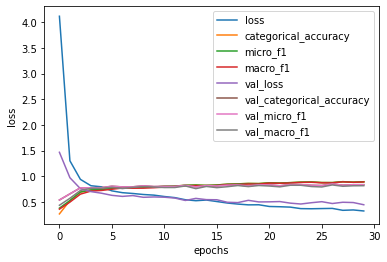

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
# almost same accuracy as model with 1 hidden layer with 2185 neurons.

### Experiment with activation functions

In [ ]:
def build_model_activation(activation_):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(2185, activation=activation_))


  model.add(tf.keras.layers.Dense(7, activation='softmax'))

  model.compile(loss = 'categorical_crossentropy',
                        optimizer = 'adam',
                        metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                        )
  return model

In [ ]:
keras_cls = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model_activation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
  "activation_":['elu','relu','tanh','sigmoid'],
}

rnd_search_cv = rnd_search_cv = GridSearchCV(estimator=keras_cls, cv=5, param_grid=params, scoring={'acc':accuracy_,'f1_micro':f1_micro_,'f1_macro':f1_macro_}, refit='acc')

In [ ]:
rnd_result = rnd_search_cv.fit(train_image_X, train_image_y, batch_size=128, epochs=30)

Epoch 1/30
19/19 [==============================] - 1s 7ms/step - loss: 15.9249 - categorical_accuracy: 0.2324 - micro_f1: 0.6020 - macro_f1: 0.5930
Epoch 2/30
19/19 [==============================] - 0s 7ms/step - loss: 2.0152 - categorical_accuracy: 0.4134 - micro_f1: 0.4134 - macro_f1: 0.3809
Epoch 3/30
19/19 [==============================] - 0s 7ms/step - loss: 1.1792 - categorical_accuracy: 0.5692 - micro_f1: 0.5692 - macro_f1: 0.5542
Epoch 4/30
19/19 [==============================] - 0s 6ms/step - loss: 0.9709 - categorical_accuracy: 0.6599 - micro_f1: 0.6599 - macro_f1: 0.6086
Epoch 5/30
19/19 [==============================] - 0s 6ms/step - loss: 0.8734 - categorical_accuracy: 0.7013 - micro_f1: 0.7013 - macro_f1: 0.6526
Epoch 6/30
19/19 [==============================] - 0s 6ms/step - loss: 0.7824 - categorical_accuracy: 0.7399 - micro_f1: 0.7399 - macro_f1: 0.7050
Epoch 7/30
19/19 [==============================] - 0s 6ms/step - loss: 0.7377 - categorical_accuracy: 0.7581 -

In [ ]:
image_activations_rnd_results = pd.DataFrame(rnd_result.cv_results_)

In [ ]:
import joblib 

joblib.dump(image_activations_rnd_results,'image_activations_rnd_results.pkl')

['image_activations_rnd_results.pkl']

In [ ]:
from google.colab import files

files.download('image_activations_rnd_results.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rnd_result.best_params_

{'activation_': 'elu'}

In [ ]:
image_activations_rnd_results[['params','mean_test_acc','rank_test_acc']]

,params,mean_test_acc,rank_test_acc
0,{'activation_': 'elu'},0.811457,1
1,{'activation_': 'relu'},0.792899,4
2,{'activation_': 'tanh'},0.800526,3
3,{'activation_': 'sigmoid'},0.803176,2


In [ ]:
image_activations_rnd_results[['params','mean_test_f1_micro','rank_test_f1_micro']]

,params,mean_test_f1_micro,rank_test_f1_micro
0,{'activation_': 'elu'},0.811457,1
1,{'activation_': 'relu'},0.792899,4
2,{'activation_': 'tanh'},0.800526,3
3,{'activation_': 'sigmoid'},0.803176,2


In [ ]:
image_activations_rnd_results[['params','mean_test_f1_macro','rank_test_f1_macro']]

,params,mean_test_f1_macro,rank_test_f1_macro
0,{'activation_': 'elu'},0.792858,1
1,{'activation_': 'relu'},0.771310,4
2,{'activation_': 'tanh'},0.779041,3
3,{'activation_': 'sigmoid'},0.786184,2


In [ ]:
import joblib

In [ ]:
image_activations_rnd_results = joblib.load('image_activations_rnd_results.pkl')

In [ ]:
# ACCURACY
print('Accuracy: ',list(image_activations_rnd_results[(image_activations_rnd_results['param_activation_']=='elu')]['mean_test_acc'])[0],end='\n'+'-'*100+'\n')
# F1_MICRO
print('F1_micro: ',list(image_activations_rnd_results[(image_activations_rnd_results['param_activation_']=='elu')]['mean_test_f1_micro'])[0],end='\n'+'-'*100+'\n')
# F1_MACRO
print('F1_macro: ',list(image_activations_rnd_results[(image_activations_rnd_results['param_activation_']=='elu')]['mean_test_f1_macro'])[0],end='\n'+'-'*100+'\n')

Accuracy:  0.8114565143378034
----------------------------------------------------------------------------------------------------
F1_micro:  0.8114565143378034
----------------------------------------------------------------------------------------------------
F1_macro:  0.7928584322749067
----------------------------------------------------------------------------------------------------


In [ ]:
# elu activation function is working best.

### 95% confidence interval

In [ ]:
import numpy as np
import scipy.stats as st

accuracies = np.array(image_activations_rnd_results[(image_activations_rnd_results['param_activation_']=='elu')].iloc[:,6:11]).reshape(5,)
micros = np.array(image_activations_rnd_results[(image_activations_rnd_results['param_activation_']=='elu')].iloc[:,14:19]).reshape(5,)
macros = np.array(image_activations_rnd_results[(image_activations_rnd_results['param_activation_']=='elu')].iloc[:,22:27]).reshape(5,)

c1 = st.t.interval(alpha=0.95, df=len(accuracies)-1,
              loc=np.mean(accuracies),
              scale=st.sem(accuracies))

c2 = st.t.interval(alpha=0.95, df=len(micros)-1,
              loc=np.mean(micros),
              scale=st.sem(micros))

c3 = st.t.interval(alpha=0.95, df=len(macros)-1,
              loc=np.mean(macros),
              scale=st.sem(macros))

print('95% confidence interval for accuracy:',c1)
print('95% confidence interval for micro-f1:',c2)
print('95% confidence interval for macro-f1:',c3)

95% confidence interval for accuracy: (0.79293699301906, 0.8299760356565469)
95% confidence interval for micro-f1: (0.7929369930190598, 0.829976035656547)
95% confidence interval for macro-f1: (0.7615928144754488, 0.8241240500743646)


### Wide & Deep Neural Network

In [ ]:
# Let's build a wide and deep neural network with following specifications:

# input layer
# 1 hidden with 2185 neurons each with elu activation function
# concatenated input layer + output of hidden layer
# output layer

In [ ]:
input = tf.keras.layers.Input(shape=X_train.shape[1:])
hidden1 = tf.keras.layers.Dense(2185, activation="elu")(input)
concat = tf.keras.layers.Concatenate()([input,hidden1])
output = tf.keras.layers.Dense(7, activation="softmax")(concat)
wide_n_deep_model = tf.keras.models.Model(inputs=[input], outputs=[output])

In [ ]:
wide_n_deep_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 2185)         8951945     ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 6281)         0           ['input_1[0][0]',                
                                                                  'dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 7)            43974       ['concatenate[0][0]']        

In [ ]:
wide_n_deep_model.compile(loss = 'categorical_crossentropy',
                        optimizer = 'adam',
                        metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                        )

In [ ]:
history = wide_n_deep_model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
19/19 [==============================] - 5s 24ms/step - loss: 9.9175 - categorical_accuracy: 0.2676 - micro_f1: 0.2676 - macro_f1: 0.2518 - val_loss: 2.5760 - val_categorical_accuracy: 0.2616 - val_micro_f1: 0.2616 - val_macro_f1: 0.1653
Epoch 2/30
19/19 [==============================] - 0s 12ms/step - loss: 1.7875 - categorical_accuracy: 0.4615 - micro_f1: 0.4615 - macro_f1: 0.4294 - val_loss: 0.9681 - val_categorical_accuracy: 0.6440 - val_micro_f1: 0.6440 - val_macro_f1: 0.5931
Epoch 3/30
19/19 [==============================] - 0s 10ms/step - loss: 0.9705 - categorical_accuracy: 0.6599 - micro_f1: 0.6599 - macro_f1: 0.6221 - val_loss: 0.8338 - val_categorical_accuracy: 0.7020 - val_micro_f1: 0.7020 - val_macro_f1: 0.6476
Epoch 4/30
19/19 [==============================] - 0s 10ms/step - loss: 0.7849 - categorical_accuracy: 0.7452 - micro_f1: 0.7452 - macro_f1: 0.7228 - val_loss: 0.7287 - val_categorical_accuracy: 0.7351 - val_micro_f1: 0.7351 - val_macro_f1: 0.7129
Epoc

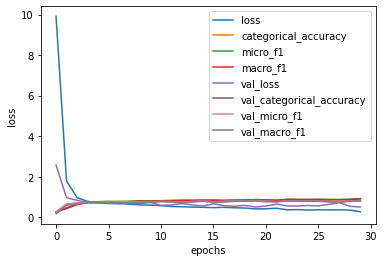

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
# not much increase in performance with wide & deep neural network.

### Experiment with regularization techniques

#### Early stopping

In [ ]:
def build_model_early_stopping():
  early_stopping_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2185, activation='elu'),
    tf.keras.layers.Dense(7, activation='softmax'),
  ])

  early_stopping_model.compile(loss = 'categorical_crossentropy',
                          optimizer = 'adam',
                          metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                          )
  return early_stopping_model

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

early_stopping_res = {
        'accuracy' : [],
        'micro' : [],
        'macro' : []
}

labels = np.array(list(map(lambda x: np.argmax(x),train_image_y)))

fold_no = 1
for train, test in skf.split(train_image_X, labels):

  model = build_model_early_stopping()

  print(f'Training on fold {fold_no}:')

  history = model.fit(train_image_X[train], train_image_y[train], batch_size=128, epochs=300, validation_data=(train_image_X[test], train_image_y[test]), callbacks=[early_stopping_cb])

  scores = model.evaluate(train_image_X[test], train_image_y[test])

  early_stopping_res['accuracy'].append(scores[1])
  early_stopping_res['micro'].append(scores[2])
  early_stopping_res['macro'].append(scores[3])

  fold_no = fold_no + 1

Training on fold 1:
Epoch 1/300
19/19 [==============================] - 1s 25ms/step - loss: 13.0842 - categorical_accuracy: 0.2428 - micro_f1: 0.3639 - macro_f1: 0.3463 - val_loss: 2.3518 - val_categorical_accuracy: 0.3692 - val_micro_f1: 0.3692 - val_macro_f1: 0.1837
Epoch 2/300
19/19 [==============================] - 0s 10ms/step - loss: 1.6861 - categorical_accuracy: 0.4681 - micro_f1: 0.4681 - macro_f1: 0.4377 - val_loss: 1.3202 - val_categorical_accuracy: 0.5877 - val_micro_f1: 0.5877 - val_macro_f1: 0.4792
Epoch 3/300
19/19 [==============================] - 0s 10ms/step - loss: 1.0008 - categorical_accuracy: 0.6483 - micro_f1: 0.6483 - macro_f1: 0.6225 - val_loss: 0.8961 - val_categorical_accuracy: 0.7036 - val_micro_f1: 0.7036 - val_macro_f1: 0.6789
Epoch 4/300
19/19 [==============================] - 0s 12ms/step - loss: 0.8396 - categorical_accuracy: 0.7046 - micro_f1: 0.7046 - macro_f1: 0.6844 - val_loss: 0.8432 - val_categorical_accuracy: 0.7185 - val_micro_f1: 0.7185 - 

In [ ]:
image_early_stopping_res = pd.DataFrame(early_stopping_res)

In [ ]:
image_early_stopping_res

,accuracy,micro,macro
0,0.827815,0.827815,0.815238
1,0.842715,0.842715,0.828824
2,0.862583,0.862583,0.854894
3,0.817579,0.817579,0.809735
4,0.819237,0.819237,0.813374


In [ ]:
import joblib

joblib.dump(image_early_stopping_res,'image_early_stopping_res.pkl')

['image_early_stopping_res.pkl']

In [ ]:
from google.colab import files

files.download('image_early_stopping_res.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

image_early_stopping_res = joblib.load('image_early_stopping_res.pkl')

In [ ]:
print('Mean accuracy from early stopping:',image_early_stopping_res['accuracy'].mean())

Mean accuracy from early stopping: 0.833985710144043


In [ ]:
import numpy as np
import scipy.stats as st

c1 = st.t.interval(alpha=0.95, df=len(image_early_stopping_res['accuracy'])-1,
              loc=np.mean(image_early_stopping_res['accuracy']),
              scale=st.sem(image_early_stopping_res['accuracy']))

c2 = st.t.interval(alpha=0.95, df=len(image_early_stopping_res['micro'])-1,
              loc=np.mean(image_early_stopping_res['micro']),
              scale=st.sem(image_early_stopping_res['micro']))

c3 = st.t.interval(alpha=0.95, df=len(image_early_stopping_res['macro'])-1,
              loc=np.mean(image_early_stopping_res['macro']),
              scale=st.sem(image_early_stopping_res['macro']))

print('95% confidence interval for accuracy:',c1)
print('95% confidence interval for micro-f1:',c2)
print('95% confidence interval for macro-f1:',c3)

95% confidence interval for accuracy: (0.8106009627623899, 0.8573704575256961)
95% confidence interval for micro-f1: (0.8106009627623899, 0.8573704575256961)
95% confidence interval for macro-f1: (0.8014335249713863, 0.8473927880474125)


#### Dropout rate

In [ ]:
def build_model_dropout():
  dropout_model = tf.keras.models.Sequential([
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(2185, activation='elu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(7, activation='softmax')
  ])

  dropout_model.compile(loss = 'categorical_crossentropy',
                          optimizer = 'adam',
                          metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                          )
  return dropout_model

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

dropout_res = {
        'accuracy' : [],
        'micro' : [],
        'macro' : []
}

labels = np.array(list(map(lambda x: np.argmax(x),train_image_y)))

fold_no = 1
for train, test in skf.split(train_image_X, labels):

  model = build_model_dropout()

  print(f'Training on fold {fold_no}:')

  history = model.fit(train_image_X[train], train_image_y[train], batch_size=128, epochs=300, validation_data=(train_image_X[test], train_image_y[test]), callbacks=[early_stopping_cb])

  scores = model.evaluate(train_image_X[test], train_image_y[test])

  dropout_res['accuracy'].append(scores[1])
  dropout_res['micro'].append(scores[2])
  dropout_res['macro'].append(scores[3])

  fold_no = fold_no + 1

Training on fold 1:
Epoch 1/300
19/19 [==============================] - 1s 24ms/step - loss: 11.9726 - categorical_accuracy: 0.2494 - micro_f1: 0.4672 - macro_f1: 0.4605 - val_loss: 3.0158 - val_categorical_accuracy: 0.3328 - val_micro_f1: 0.3328 - val_macro_f1: 0.2515
Epoch 2/300
19/19 [==============================] - 0s 10ms/step - loss: 1.8527 - categorical_accuracy: 0.4569 - micro_f1: 0.4569 - macro_f1: 0.4037 - val_loss: 1.2501 - val_categorical_accuracy: 0.6308 - val_micro_f1: 0.6308 - val_macro_f1: 0.5646
Epoch 3/300
19/19 [==============================] - 0s 10ms/step - loss: 1.1782 - categorical_accuracy: 0.5737 - micro_f1: 0.5737 - macro_f1: 0.5422 - val_loss: 0.9351 - val_categorical_accuracy: 0.6623 - val_micro_f1: 0.6623 - val_macro_f1: 0.5758
Epoch 4/300
19/19 [==============================] - 0s 10ms/step - loss: 1.0609 - categorical_accuracy: 0.6288 - micro_f1: 0.6288 - macro_f1: 0.5974 - val_loss: 0.8795 - val_categorical_accuracy: 0.6871 - val_micro_f1: 0.6871 - 

In [ ]:
image_dropout_res = pd.DataFrame(dropout_res)

In [ ]:
image_dropout_res

,accuracy,micro,macro
0,0.837748,0.837748,0.821897
1,0.852649,0.852649,0.843109
2,0.859272,0.859272,0.852933
3,0.860696,0.860696,0.855269
4,0.849088,0.849088,0.834958


In [ ]:
import joblib

joblib.dump(image_dropout_res,'image_dropout_res.pkl')

['image_dropout_res.pkl']

In [ ]:
from google.colab import files

files.download('image_dropout_res.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

image_dropout_res = joblib.load('image_dropout_res.pkl')

In [ ]:
print('Mean accuracy from random dropouts + early stopping:',image_dropout_res['accuracy'].mean())

Mean accuracy from random dropouts + early stopping: 0.8518906593322754


In [ ]:
import numpy as np
import scipy.stats as st

c1 = st.t.interval(alpha=0.95, df=len(image_dropout_res['accuracy'])-1,
              loc=np.mean(image_dropout_res['accuracy']),
              scale=st.sem(image_dropout_res['accuracy']))

c2 = st.t.interval(alpha=0.95, df=len(image_dropout_res['micro'])-1,
              loc=np.mean(image_dropout_res['micro']),
              scale=st.sem(image_dropout_res['micro']))

c3 = st.t.interval(alpha=0.95, df=len(image_dropout_res['macro'])-1,
              loc=np.mean(image_dropout_res['macro']),
              scale=st.sem(image_dropout_res['macro']))

print('95% confidence interval for accuracy:',c1)
print('95% confidence interval for micro-f1:',c2)
print('95% confidence interval for macro-f1:',c3)

95% confidence interval for accuracy: (0.8404354171688193, 0.8633459014957314)
95% confidence interval for micro-f1: (0.8404354171688193, 0.8633459014957314)
95% confidence interval for macro-f1: (0.8246324334073265, 0.8586337771487038)


### L1 for sparse model

In [ ]:
def build_model_l1():
  l1_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2185, activation='elu', kernel_regularizer=tf.keras.regularizers.l1(0.0001)),
    tf.keras.layers.Dense(7, activation='softmax'),
  ])

  l1_model.compile(loss = 'categorical_crossentropy',
                          optimizer = 'adam',
                          metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                          )
  return l1_model

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

l1_res = {
        'accuracy' : [],
        'micro' : [],
        'macro' : []
}

labels = np.array(list(map(lambda x: np.argmax(x),train_image_y)))

fold_no = 1
for train, test in skf.split(train_image_X, labels):

  model = build_model_l1()

  print(f'Training on fold {fold_no}:')

  history = model.fit(train_image_X[train], train_image_y[train], batch_size=128, epochs=300, validation_data=(train_image_X[test], train_image_y[test]), callbacks=[early_stopping_cb])

  scores = model.evaluate(train_image_X[test], train_image_y[test])

  l1_res['accuracy'].append(scores[1])
  l1_res['micro'].append(scores[2])
  l1_res['macro'].append(scores[3])

  fold_no = fold_no + 1

Training on fold 1:
Epoch 1/300
19/19 [==============================] - 1s 27ms/step - loss: 24.9217 - categorical_accuracy: 0.3082 - micro_f1: 0.3968 - macro_f1: 0.3619 - val_loss: 15.8400 - val_categorical_accuracy: 0.2732 - val_micro_f1: 0.2732 - val_macro_f1: 0.2316
Epoch 2/300
19/19 [==============================] - 0s 11ms/step - loss: 14.3572 - categorical_accuracy: 0.5240 - micro_f1: 0.5240 - macro_f1: 0.4855 - val_loss: 13.3112 - val_categorical_accuracy: 0.6043 - val_micro_f1: 0.6043 - val_macro_f1: 0.5432
Epoch 3/300
19/19 [==============================] - 0s 11ms/step - loss: 12.5488 - categorical_accuracy: 0.6810 - micro_f1: 0.6810 - macro_f1: 0.6387 - val_loss: 11.7924 - val_categorical_accuracy: 0.7334 - val_micro_f1: 0.7334 - val_macro_f1: 0.6832
Epoch 4/300
19/19 [==============================] - 0s 10ms/step - loss: 11.1952 - categorical_accuracy: 0.7581 - micro_f1: 0.7581 - macro_f1: 0.7239 - val_loss: 10.6060 - val_categorical_accuracy: 0.7401 - val_micro_f1: 0.

In [ ]:
image_l1_res = pd.DataFrame(l1_res)

In [ ]:
image_l1_res

,accuracy,micro,macro
0,0.824503,0.824503,0.809435
1,0.855960,0.855960,0.840645
2,0.852649,0.852649,0.838062
3,0.840796,0.840796,0.826274
4,0.825871,0.825871,0.820080


In [ ]:
import joblib

joblib.dump(image_l1_res,'image_l1_res.pkl')

['image_l1_res.pkl']

In [ ]:
from google.colab import files

files.download('image_l1_res.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

image_l1_res = joblib.load('image_l1_res.pkl')

In [ ]:
print('Mean accuracy from l1 regularization:',image_l1_res['accuracy'].mean())

Mean accuracy from l1 regularization: 0.8399558424949646


In [ ]:
import numpy as np
import scipy.stats as st

c1 = st.t.interval(alpha=0.95, df=len(image_l1_res['accuracy'])-1,
              loc=np.mean(image_l1_res['accuracy']),
              scale=st.sem(image_l1_res['accuracy']))

c2 = st.t.interval(alpha=0.95, df=len(image_l1_res['micro'])-1,
              loc=np.mean(image_l1_res['micro']),
              scale=st.sem(image_l1_res['micro']))

c3 = st.t.interval(alpha=0.95, df=len(image_l1_res['macro'])-1,
              loc=np.mean(image_l1_res['macro']),
              scale=st.sem(image_l1_res['macro']))

print('95% confidence interval for accuracy:',c1)
print('95% confidence interval for micro-f1:',c2)
print('95% confidence interval for macro-f1:',c3)

95% confidence interval for accuracy: (0.8218010109179187, 0.8581106740720105)
95% confidence interval for micro-f1: (0.8218010489940064, 0.8581106359959227)
95% confidence interval for macro-f1: (0.8108839866595419, 0.8429146650357096)


In [ ]:
# random dropouts and early stopping together are working really well.

### Experiment with at least 2 more Optimizers 

In [ ]:
def build_model_optimizer(opt):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(2185, activation='elu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(7, activation='softmax')
  ])

  model.compile(loss = 'categorical_crossentropy',
                          optimizer = opt,
                          metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                          )
  return model

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

optimizer_res = {
  'nadam':{
      'accuracy' : [],
      'micro' : [],
      'macro' : []
  },
  'adam':{
      'accuracy' : [],
      'micro' : [],
      'macro' : []      
  },
  'sgd':{
      'accuracy' : [],
      'micro' : [],
      'macro' : []      
  }
}

labels = np.array(list(map(lambda x: np.argmax(x),train_image_y)))

optimizers = ['nadam','adam','sgd'];

for opt in optimizers:
  fold_no = 1
  print(f'Optimizer: {opt}')
  for train, test in skf.split(train_image_X, labels):

    model = build_model_optimizer(opt)

    print(f'Training on fold {fold_no}:')

    history = model.fit(train_image_X[train], train_image_y[train], batch_size=128, epochs=300, validation_data=(train_image_X[test], train_image_y[test]), callbacks=[early_stopping_cb])

    scores = model.evaluate(train_image_X[test], train_image_y[test])

    optimizer_res[opt]['accuracy'].append(scores[1])
    optimizer_res[opt]['micro'].append(scores[2])
    optimizer_res[opt]['macro'].append(scores[3])

    fold_no = fold_no + 1

Optimizer: nadam
Training on fold 1:
Epoch 1/300
19/19 [==============================] - 6s 34ms/step - loss: 10.8632 - categorical_accuracy: 0.3007 - micro_f1: 0.3007 - macro_f1: 0.2806 - val_loss: 2.0264 - val_categorical_accuracy: 0.3609 - val_micro_f1: 0.3609 - val_macro_f1: 0.2662
Epoch 2/300
19/19 [==============================] - 0s 15ms/step - loss: 1.7446 - categorical_accuracy: 0.4615 - micro_f1: 0.4615 - macro_f1: 0.4441 - val_loss: 0.9454 - val_categorical_accuracy: 0.6805 - val_micro_f1: 0.6805 - val_macro_f1: 0.6114
Epoch 3/300
19/19 [==============================] - 0s 13ms/step - loss: 1.4559 - categorical_accuracy: 0.5137 - micro_f1: 0.5137 - macro_f1: 0.4942 - val_loss: 0.9463 - val_categorical_accuracy: 0.6772 - val_micro_f1: 0.6772 - val_macro_f1: 0.6536
Epoch 4/300
19/19 [==============================] - 0s 12ms/step - loss: 1.5202 - categorical_accuracy: 0.5220 - micro_f1: 0.5220 - macro_f1: 0.5075 - val_loss: 1.1856 - val_categorical_accuracy: 0.6623 - val_mi

In [ ]:
image_sgd_optimizer = pd.DataFrame(optimizer_res['sgd'])
image_sgd_optimizer

,accuracy,micro,macro
0,0.824503,0.824503,0.816763
1,0.798013,0.798013,0.788801
2,0.789735,0.789735,0.769798
3,0.810945,0.810945,0.797379
4,0.791045,0.791045,0.768386


In [ ]:
import joblib

joblib.dump(image_sgd_optimizer,'image_sgd_optimizer.pkl')

['image_sgd_optimizer.pkl']

In [ ]:
from google.colab import files

files.download('image_sgd_optimizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print('Mean accuracy with sgd optimizer:',image_sgd_optimizer['accuracy'].mean())

Mean accuracy with sgd optimizer: 0.8028483390808105


In [ ]:
image_sgd_optimizer = joblib.load('image_sgd_optimizer.pkl')

In [ ]:
import numpy as np
import scipy.stats as st

c1 = st.t.interval(alpha=0.95, df=len(image_sgd_optimizer['accuracy'])-1,
              loc=np.mean(image_sgd_optimizer['accuracy']),
              scale=st.sem(image_sgd_optimizer['accuracy']))

c2 = st.t.interval(alpha=0.95, df=len(image_sgd_optimizer['micro'])-1,
              loc=np.mean(image_sgd_optimizer['micro']),
              scale=st.sem(image_sgd_optimizer['micro']))

c3 = st.t.interval(alpha=0.95, df=len(image_sgd_optimizer['macro'])-1,
              loc=np.mean(image_sgd_optimizer['macro']),
              scale=st.sem(image_sgd_optimizer['macro']))

print('95% confidence interval for accuracy:',c1)
print('95% confidence interval for micro-f1:',c2)
print('95% confidence interval for macro-f1:',c3)

95% confidence interval for accuracy: (0.7845452949873181, 0.821151383174303)
95% confidence interval for micro-f1: (0.7845453129770856, 0.8211513890263933)
95% confidence interval for macro-f1: (0.7631473508362281, 0.8133035215850366)


In [ ]:
image_adam_optimizer = pd.DataFrame(optimizer_res['adam'])
image_adam_optimizer

,accuracy,micro,macro
0,0.855960,0.855960,0.850497
1,0.860927,0.860927,0.850271
2,0.867550,0.867550,0.852596
3,0.859038,0.859038,0.846520
4,0.820895,0.820895,0.804517


In [ ]:
import joblib

joblib.dump(image_adam_optimizer,'image_adam_optimizer.pkl')

['image_adam_optimizer.pkl']

In [ ]:
from google.colab import files

files.download('image_adam_optimizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print('Mean accuracy with adam optimizer:',image_adam_optimizer['accuracy'].mean())

Mean accuracy with adam optimizer: 0.8528741359710693


In [ ]:
image_adam_optimizer = joblib.load('image_adam_optimizer.pkl')

In [ ]:
import numpy as np
import scipy.stats as st

c1 = st.t.interval(alpha=0.95, df=len(image_adam_optimizer['accuracy'])-1,
              loc=np.mean(image_adam_optimizer['accuracy']),
              scale=st.sem(image_adam_optimizer['accuracy']))

c2 = st.t.interval(alpha=0.95, df=len(image_adam_optimizer['micro'])-1,
              loc=np.mean(image_adam_optimizer['micro']),
              scale=st.sem(image_adam_optimizer['micro']))

c3 = st.t.interval(alpha=0.95, df=len(image_adam_optimizer['macro'])-1,
              loc=np.mean(image_adam_optimizer['macro']),
              scale=st.sem(image_adam_optimizer['macro']))

print('95% confidence interval for accuracy:',c1)
print('95% confidence interval for micro-f1:',c2)
print('95% confidence interval for macro-f1:',c3)

95% confidence interval for accuracy: (0.8300601476462361, 0.8756881242959025)
95% confidence interval for micro-f1: (0.8300601445467837, 0.875688127395355)
95% confidence interval for macro-f1: (0.8154940681458643, 0.8662662906645605)


In [ ]:
image_nadam_optimizer = pd.DataFrame(optimizer_res['nadam'])
image_nadam_optimizer

,accuracy,micro,macro
0,0.875828,0.875828,0.866151
1,0.844371,0.844371,0.836007
2,0.854305,0.854305,0.839921
3,0.867330,0.867330,0.857917
4,0.847430,0.847430,0.837666


In [ ]:
import joblib

joblib.dump(image_nadam_optimizer,'image_nadam_optimizer.pkl')

['image_nadam_optimizer.pkl']

In [ ]:
from google.colab import files

files.download('image_nadam_optimizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print('Mean accuracy with nadam optimizer:',image_nadam_optimizer['accuracy'].mean())

Mean accuracy with nadam optimizer: 0.857852554321289


In [ ]:
image_nadam_optimizer = joblib.load('image_nadam_optimizer.pkl')

In [ ]:
import numpy as np
import scipy.stats as st

c1 = st.t.interval(alpha=0.95, df=len(image_nadam_optimizer['accuracy'])-1,
              loc=np.mean(image_nadam_optimizer['accuracy']),
              scale=st.sem(image_nadam_optimizer['accuracy']))

c2 = st.t.interval(alpha=0.95, df=len(image_nadam_optimizer['micro'])-1,
              loc=np.mean(image_nadam_optimizer['micro']),
              scale=st.sem(image_nadam_optimizer['micro']))

c3 = st.t.interval(alpha=0.95, df=len(image_nadam_optimizer['macro'])-1,
              loc=np.mean(image_nadam_optimizer['macro']),
              scale=st.sem(image_nadam_optimizer['macro']))

print('95% confidence interval for accuracy:',c1)
print('95% confidence interval for micro-f1:',c2)
print('95% confidence interval for macro-f1:',c3)

95% confidence interval for accuracy: (0.8412412017805331, 0.874463906862045)
95% confidence interval for micro-f1: (0.8412411841531846, 0.8744638768056776)
95% confidence interval for macro-f1: (0.8306142603908382, 0.8644508088077703)


In [ ]:
# nadam optimizer is giving highest accuracy.

### Final Model

In [ ]:
# specifications:

# hidden layers: 1 hidden layer
# number of neurons in hidden layer: 2185

# activation function in hidden layer: elu

# activation function in output layer: softmax

# regularizer: random dropouts(rate 0.3) + early stopping

# optimizer: nadam

In [ ]:
captcha_final_model = tf.keras.models.Sequential([
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(2185, activation='elu'),
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(7, activation='softmax')
])

captcha_final_model.compile(loss = 'categorical_crossentropy',
                        optimizer = 'nadam',
                        metrics = [tf.keras.metrics.CategoricalAccuracy(), micro_f1, macro_f1]
                        )

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [ ]:
captcha_final_model.fit(train_image_X, train_image_y, batch_size=128, epochs=300, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/300
24/24 [==============================] - 2s 30ms/step - loss: 9.0819 - categorical_accuracy: 0.3241 - micro_f1: 0.4018 - macro_f1: 0.3806 - val_loss: 1.8163 - val_categorical_accuracy: 0.3626 - val_micro_f1: 0.3626 - val_macro_f1: 0.2657
Epoch 2/300
24/24 [==============================] - 0s 13ms/step - loss: 1.4772 - categorical_accuracy: 0.5027 - micro_f1: 0.5027 - macro_f1: 0.4796 - val_loss: 1.5708 - val_categorical_accuracy: 0.4123 - val_micro_f1: 0.4123 - val_macro_f1: 0.4229
Epoch 3/300
24/24 [==============================] - 0s 12ms/step - loss: 1.4050 - categorical_accuracy: 0.5527 - micro_f1: 0.5527 - macro_f1: 0.5344 - val_loss: 1.6168 - val_categorical_accuracy: 0.4752 - val_micro_f1: 0.4752 - val_macro_f1: 0.3708
Epoch 4/300
24/24 [==============================] - 0s 13ms/step - loss: 1.2670 - categorical_accuracy: 0.5858 - micro_f1: 0.5858 - macro_f1: 0.5705 - val_loss: 0.9161 - val_categorical_accuracy: 0.7020 - val_micro_f1: 0.7020 - val_macro_f1: 0.6331


In [ ]:
captcha_final_model.evaluate(test_image_X,test_image_y)

24/24 [==============================] - 0s 3ms/step - loss: 0.4125 - categorical_accuracy: 0.9048 - micro_f1: 0.9048 - macro_f1: 0.8963


[0.4125284254550934, 0.904825747013092, 0.904825747013092, 0.8963378071784973]

In [ ]:
y = np.argmax(test_image_y,axis=1)
y_pred = np.argmax(captcha_final_model.predict(test_image_X),axis=1)

In [ ]:
y

array([1, 6, 3, 1, 0, 3, 4, 1, 0, 4, 1, 2, 0, 1, 1, 5, 6, 0, 1, 5, 0, 3,
       0, 5, 0, 4, 0, 0, 3, 3, 4, 6, 5, 0, 5, 0, 1, 4, 5, 6, 5, 2, 5, 2,
       0, 1, 2, 0, 5, 5, 5, 0, 1, 0, 4, 4, 4, 3, 0, 1, 4, 4, 4, 4, 2, 4,
       0, 5, 3, 1, 1, 0, 1, 5, 4, 1, 6, 4, 0, 0, 6, 3, 4, 0, 0, 6, 1, 5,
       4, 4, 0, 1, 3, 5, 5, 0, 1, 2, 5, 0, 5, 0, 1, 5, 2, 5, 0, 5, 0, 5,
       1, 0, 6, 0, 1, 0, 0, 0, 5, 5, 0, 1, 5, 5, 0, 5, 0, 0, 2, 4, 0, 6,
       4, 4, 4, 5, 0, 6, 3, 5, 0, 0, 1, 6, 6, 3, 6, 5, 2, 5, 0, 1, 3, 6,
       4, 3, 3, 2, 2, 6, 5, 4, 5, 3, 0, 6, 4, 6, 2, 0, 3, 1, 0, 2, 1, 5,
       4, 2, 3, 1, 1, 2, 6, 4, 6, 5, 0, 0, 1, 2, 4, 3, 1, 0, 4, 4, 5, 6,
       5, 3, 1, 0, 1, 4, 2, 4, 1, 5, 5, 1, 4, 4, 0, 5, 4, 1, 0, 3, 5, 5,
       5, 3, 2, 4, 4, 1, 2, 4, 1, 5, 3, 2, 0, 2, 6, 5, 3, 5, 5, 0, 0, 6,
       4, 2, 5, 5, 2, 4, 4, 1, 5, 0, 1, 5, 5, 0, 5, 2, 5, 3, 5, 4, 1, 6,
       5, 1, 4, 2, 0, 4, 2, 4, 0, 5, 4, 5, 1, 5, 3, 5, 1, 5, 0, 5, 2, 5,
       4, 1, 5, 6, 3, 0, 0, 1, 0, 4, 1, 3, 0, 0, 2,

In [ ]:
y_pred

array([1, 6, 1, 1, 0, 5, 0, 1, 0, 4, 1, 2, 0, 2, 1, 5, 6, 0, 1, 5, 0, 3,
       0, 5, 0, 1, 0, 0, 3, 3, 4, 6, 5, 0, 5, 0, 1, 4, 5, 6, 3, 1, 3, 2,
       0, 1, 2, 4, 5, 5, 5, 0, 1, 0, 1, 4, 4, 3, 5, 1, 4, 4, 4, 4, 2, 4,
       0, 5, 5, 1, 1, 0, 1, 5, 4, 1, 6, 4, 0, 0, 6, 3, 4, 0, 0, 6, 1, 5,
       4, 4, 0, 1, 4, 5, 5, 0, 1, 2, 5, 0, 5, 0, 1, 5, 2, 5, 0, 5, 0, 5,
       1, 0, 1, 0, 0, 0, 0, 0, 5, 5, 0, 1, 5, 5, 0, 5, 0, 0, 2, 4, 0, 6,
       1, 4, 4, 5, 0, 6, 5, 4, 0, 0, 1, 6, 6, 3, 6, 5, 2, 5, 0, 1, 3, 6,
       4, 1, 3, 2, 2, 6, 5, 4, 5, 5, 0, 6, 4, 6, 2, 0, 3, 1, 0, 2, 1, 5,
       4, 2, 4, 1, 1, 2, 6, 4, 6, 1, 0, 2, 1, 2, 4, 3, 1, 0, 4, 4, 5, 6,
       5, 3, 1, 0, 1, 4, 2, 4, 1, 5, 5, 1, 4, 1, 0, 0, 1, 1, 0, 3, 5, 2,
       5, 3, 2, 4, 4, 1, 2, 4, 4, 5, 3, 2, 0, 2, 6, 5, 3, 5, 5, 0, 0, 6,
       4, 2, 5, 5, 2, 4, 4, 1, 5, 0, 1, 5, 5, 0, 3, 2, 5, 6, 5, 4, 1, 6,
       5, 1, 4, 2, 0, 4, 2, 2, 0, 5, 1, 5, 1, 5, 3, 5, 1, 5, 0, 5, 2, 5,
       4, 1, 5, 6, 5, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print(f'Accuracy: {accuracy_score(y, y_pred)}')
print(f'F1 micro: {f1_score(y, y_pred, average="micro")}')
print(f'F1 macro: {f1_score(y, y_pred, average="macro")}')

Accuracy: 0.9048257372654156
F1 micro: 0.9048257372654156
F1 macro: 0.8963378096300882


In [ ]:
confusion_matrix = confusion_matrix(y, y_pred)

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff1f617a110>)

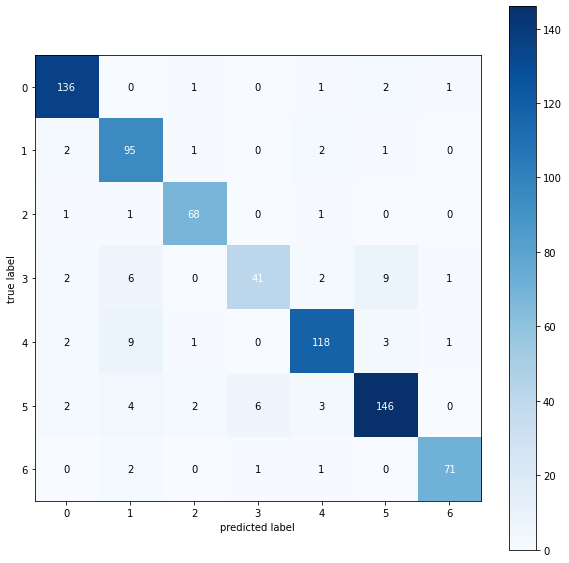

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=confusion_matrix,colorbar=True,figsize=(10,10))

In [ ]:
captcha_final_model.save('captcha_final_model.h5')

In [ ]:
files.download('captcha_final_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/ass3/captcha_final_model.h5")

In [ ]:
model.evaluate(test_image_X,test_image_y)

24/24 [==============================] - 0s 6ms/step - loss: 0.4125 - categorical_accuracy: 0.9048 - micro_f1: 0.9048 - macro_f1: 0.8963


[0.4125284254550934, 0.904825747013092, 0.904825747013092, 0.8963378071784973]

### Predictions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
!git clone https://github.com/gagan-iitb/CS550.git

Cloning into 'CS550'...
remote: Enumerating objects: 526, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 526 (delta 68), reused 187 (delta 52), pack-reused 305
Receiving objects: 100% (526/526), 152.49 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (190/190), done.
Checking out files: 100% (127/127), done.


In [ ]:
os.listdir('/content/CS550/Prog_Assignments/assignment_3_dataset/h_captcha_test_dataset')

['29.jpg',
 '61.jpg',
 'k36.jpg',
 'u39.jpg',
 'j37.jpg',
 '1r5.jpg',
 'o45.jpg',
 'x56.jpg',
 '23.jpg',
 '47.jpg',
 '21.jpg',
 'u05.jpg',
 '44.jpg',
 '64.jpg',
 '25.jpg',
 'u59.jpg',
 '68.jpg',
 'b40.jpg',
 '60.jpg',
 '24.jpg',
 '30.jpg',
 '32.jpg',
 '55.jpg',
 '14.jpg',
 'p31.jpg',
 '53.jpg',
 '17.jpg',
 '34.jpg',
 '18.jpg',
 'u16.jpg',
 'q50.jpg',
 'a69.jpg',
 'g38.jpg',
 'a54.jpg',
 '42.jpg',
 'o07.jpg',
 '19.jpg',
 '63.jpg',
 'c02.jpg',
 '67.jpg',
 '66.jpg',
 '58.jpg',
 '62.jpg',
 'a10.jpg',
 'l27.jpg',
 'l35.jpg',
 'q09.jpg',
 'p08.jpg',
 'v01.jpg',
 '49.jpg',
 'b41.jpg',
 '51.jpg',
 '11.jpg',
 'a20.jpg',
 '48.jpg',
 'a00.jpg',
 'i06.jpg',
 'b43.jpg',
 '46.jpg',
 'g04.jpg',
 'a70.jpg',
 '65.jpg',
 '57.jpg',
 'r26.jpg',
 '28.jpg',
 '22.jpg',
 't13.jpg',
 '3a3.jpg',
 '12.jpg',
 '52.jpg',
 'r03.jpg']

In [ ]:
ids = pd.read_csv('/content/CS550/Prog_Assignments/assignment_3_dataset/test_data_description_h_captcha_assignment3.csv')

In [ ]:
images = []

In [ ]:
for img in ids['test_image_name']:
  images.append(cv2.imread(f'/content/CS550/Prog_Assignments/assignment_3_dataset/h_captcha_test_dataset/{img}.jpg'))

In [ ]:
for i in range(len(images)):
  images[i] = cv2.resize(images[i],(64,64))

In [ ]:
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)

In [ ]:
for i in range(len(images)):
  images[i] = images[i]/255

In [ ]:
for i in range(len(images)):
  images[i] = images[i].reshape(64*64,)

In [ ]:
images = np.array(images)

<Figure size 2160x2160 with 0 Axes>

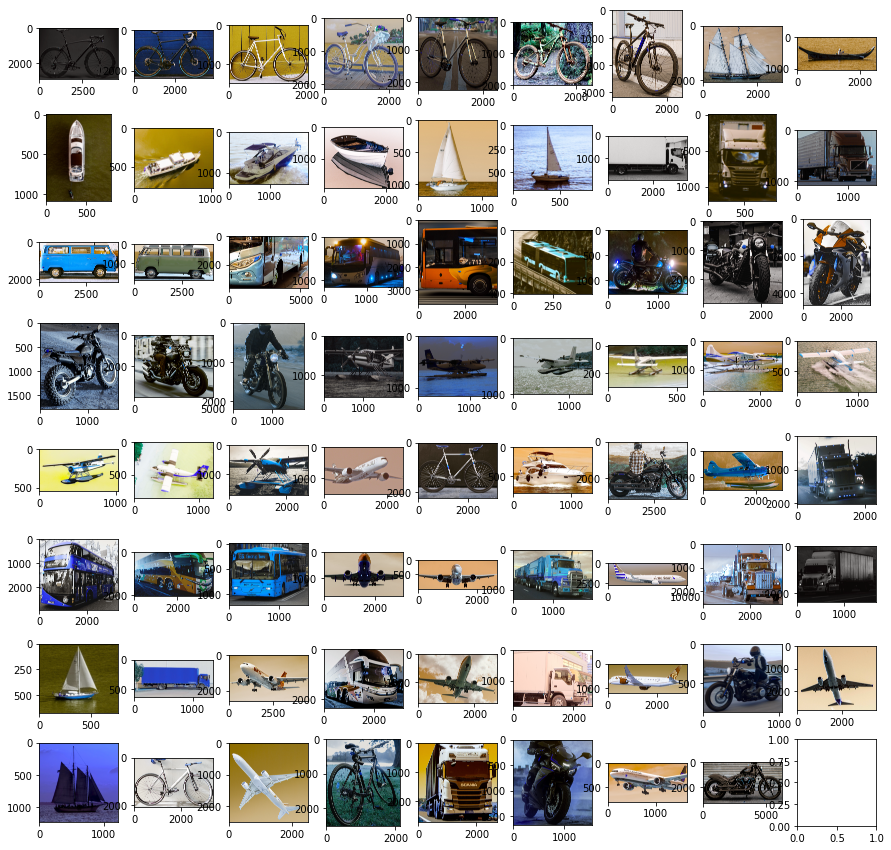

In [ ]:
count = 0
plt.figure(figsize=(30, 30))
fig, axs = plt.subplots(8, 9)
fig.set_figwidth(15)
fig.set_figheight(15)
for i in range(8):
  if(count==71):
    break
  for j in range(9):
    if(count==71):
      break
    img = ids['test_image_name'][count]
    axs[i, j].imshow(cv2.imread(f'/content/CS550/Prog_Assignments/assignment_3_dataset/h_captcha_test_dataset/{img}.jpg'))
    count+=1

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/ass3/captcha_final_model.h5")

In [ ]:
probs = model.predict(images)

In [ ]:
y_pred = np.argmax(probs,axis=1)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 2, 0, 4, 5, 0, 4, 4, 5, 4, 4, 5, 1, 3, 1, 3, 4, 3,
       3, 0, 1, 5, 5, 0, 5, 3, 5, 5, 1, 2, 4, 4, 1, 2, 3, 1, 3, 4, 5, 6,
       5, 3, 3, 3, 1, 1, 4, 4, 4, 4, 4, 0, 1, 3, 1, 4, 5, 3, 1, 5, 2, 2,
       4, 3, 3, 5, 0])

In [ ]:
predictions = list(map(lambda x:label_int2str[x],y_pred))

In [ ]:
test_id = [i for i in range(71)]

In [ ]:
captcha_submission = pd.DataFrame({'test_id':test_id,'true_labels':predictions})

In [ ]:
captcha_submission

,test_id,true_labels
0,0,motorcycle
1,1,motorcycle
2,2,motorcycle
3,3,airplane
4,4,motorcycle
...,...,...
66,66,boat
67,67,motorbus
68,68,motorbus
69,69,truck


In [ ]:
captcha_submission.to_csv('captcha_submission.csv')